In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

In [48]:
df = pd.read_csv("Heart.csv")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [50]:
del df["Unnamed: 0"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [51]:
x = df.iloc[:5]
print(x)

   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes  
3      3  0.0      normal   No  
4      1  0.0      normal   No  


In [52]:
x1 = df.iloc[-5:]
print(x1)

     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
298   45    1       typical     110   264    0        0    132      0   
299   68    1  asymptomatic     144   193    1        0    141      0   
300   57    1  asymptomatic     130   131    0        0    115      1   
301   57    0    nontypical     130   236    0        2    174      0   
302   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  
298      1.2      2  0.0  reversable  Yes  
299      3.4      2  2.0  reversable  Yes  
300      1.2      2  1.0  reversable  Yes  
301      0.0      2  1.0      normal  Yes  
302      0.0      1  NaN      normal   No  


In [53]:
# count = df.count()
# max = df.max()
# min = df.min()
# mean = df.mean()
# median = df.median()
# mode = df.mode()
# sd = df.std()

# print(f"Count = {count}")
# print(f"Max = {max}")
# print(f"Min = {min}")
# print(f"Mean = {mean}")
# print(f"Median = {median}")
# print(f"Mode = {mode}")
# print(f"Standard Deviation = {sd}")

stats1 = df.describe()
print(stats1)

              Age         Sex      RestBP        Chol         Fbs     RestECG  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868  131.689769  246.693069    0.148515    0.990099   
std      9.038662    0.467299   17.599748   51.776918    0.356198    0.994971   
min     29.000000    0.000000   94.000000  126.000000    0.000000    0.000000   
25%     48.000000    0.000000  120.000000  211.000000    0.000000    0.000000   
50%     56.000000    1.000000  130.000000  241.000000    0.000000    1.000000   
75%     61.000000    1.000000  140.000000  275.000000    0.000000    2.000000   
max     77.000000    1.000000  200.000000  564.000000    1.000000    2.000000   

            MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  299.000000  
mean   149.607261    0.326733    1.039604    1.600660    0.672241  
std     22.875003    0.469794    1.161075    0.616226    0.937438 

In [54]:
missing_data = df.isnull().sum()

print(missing_data)

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64


In [55]:
df1 = df.dropna(axis=0, how="any")
print(df1.isna().sum())
# no null value is left

count1 = df1.Fbs.count()
print(f"We can still use {count1} rows")

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64
We can still use 297 rows


<AxesSubplot:>

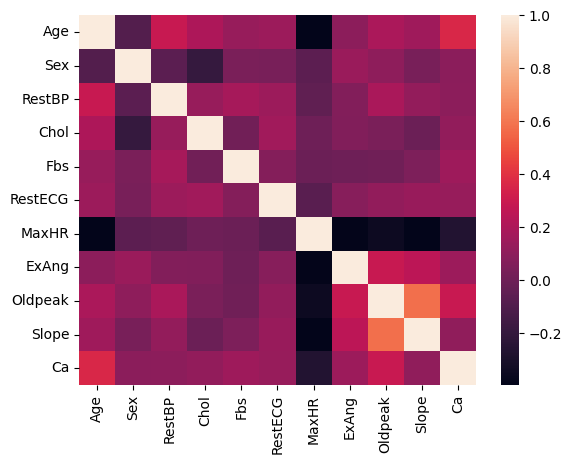

In [56]:
sns.heatmap(df1.corr())

In [57]:
age_variance = df1.Age.var()
print(f"Age variance is {age_variance}")

Age variance is 81.8977158977159


In [58]:
conditions = [df1["Age"] > 55, (df1["Age"] <= 55) & (df1["Age"] >= 40), df1["Age"] < 40]
choices = ['Elderly', 'Middle-age', 'Young']
df1['age_group'] = np.select(conditions, choices, default = np.nan)
df1

C:\Users\edwar\AppData\Local\Temp\ipykernel_5088\2631840518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_group'] = np.select(conditions, choices, default = np.nan)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,age_group
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,Elderly
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,Elderly
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Elderly
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,Young
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,Middle-age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes,Elderly
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,Middle-age
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,Elderly
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,Elderly


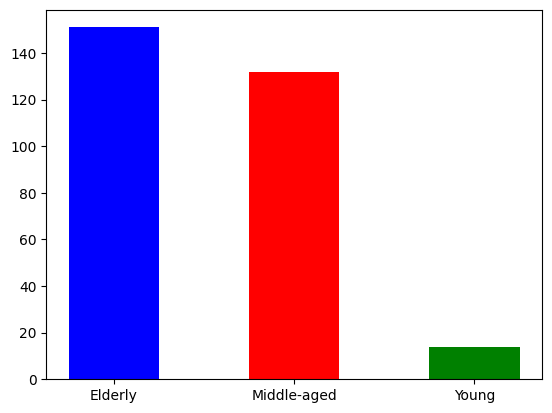

In [63]:
elderly = 0
mid = 0
young = 0


for i in df1["age_group"]:
    if i == 'Elderly':
        elderly += 1
    elif i == 'Middle-age':
        mid += 1
    else:
        young +=1

plt.bar('Elderly', elderly, color='blue', width=0.5)
plt.bar('Middle-aged', mid, color='red', width=0.5)
plt.bar('Young', young, color='green', width=0.5)
plt.show()

In [71]:
x1 = df1.iloc[:,4:12]
y = df1["RestECG"]

svm = SVC(kernel='rbf', random_state = 1, gamma = 0.5, C = 1)

svm.fit(x1, y)

y_pred=svm.predict(x1)

print(accuracy_score(y, y_pred))

1.0


In [73]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.30, random_state=1, stratify=y)
#
# Create the pipeline
#
pipeline = make_pipeline(StandardScaler(),
RandomForestClassifier(n_estimators=10, max_features=5, max_depth=2, random_state=1))
#
# Fit the Pipeline estimator
#
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=2, max_features=5,
                                        n_estimators=10, random_state=1))])